In [4]:
from numpy import loadtxt
!pip install tensorflow --upgrade --quiet
import tensorflow as tf
from tensorflow import keras

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
print(X_train_full.shape)

(60000, 28, 28)


In [8]:
print(X_train_full.dtype)

uint8


In [9]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_train[0]]

'Coat'

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
img = X_train[0]
plt.imshow(img)

## the Model

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.layers
hidden1 = model.layers[1]
weights,biases = hidden1.get_weights()
weights

array([[-0.06055801, -0.02903417,  0.03799145, ...,  0.01999196,
         0.04229745, -0.0013189 ],
       [ 0.05333646, -0.05791072,  0.02932007, ..., -0.06360832,
        -0.05469845,  0.02637687],
       [-0.01132684, -0.03854569,  0.02233898, ...,  0.04917008,
        -0.04254676, -0.07339367],
       ...,
       [ 0.01276396,  0.02415085, -0.03846658, ...,  0.03406901,
         0.01593776, -0.06053811],
       [-0.03793602,  0.02313981,  0.05244914, ...,  0.01785976,
        -0.05712442, -0.05174492],
       [ 0.05517684,  0.02318939, -0.03067109, ..., -0.05959843,
        -0.07214279,  0.03233403]], dtype=float32)

In [17]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7162 - accuracy: 0.7619 - val_loss: 0.5332 - val_accuracy: 0.8168
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4871 - accuracy: 0.8289 - val_loss: 0.4508 - val_accuracy: 0.8466
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4422 - accuracy: 0.8436 - val_loss: 0.4204 - val_accuracy: 0.8568
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4171 - accuracy: 0.8533 - val_loss: 0.4185 - val_accuracy: 0.8514
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3977 - accuracy: 0.8593 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3804 - accuracy: 0.8660 - val_loss: 0.4015 - val_accuracy: 0.8608
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3678 - accuracy: 0.8704 - val_loss: 0.3655 - val_accuracy:

In [38]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 65.7071304321289
Test accuracy: 0.8425999879837036


In [19]:
import pandas as pd
import numpy as np
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
X_new = X_test[:3]
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 118ms/step


array([9, 2, 1])

In [29]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

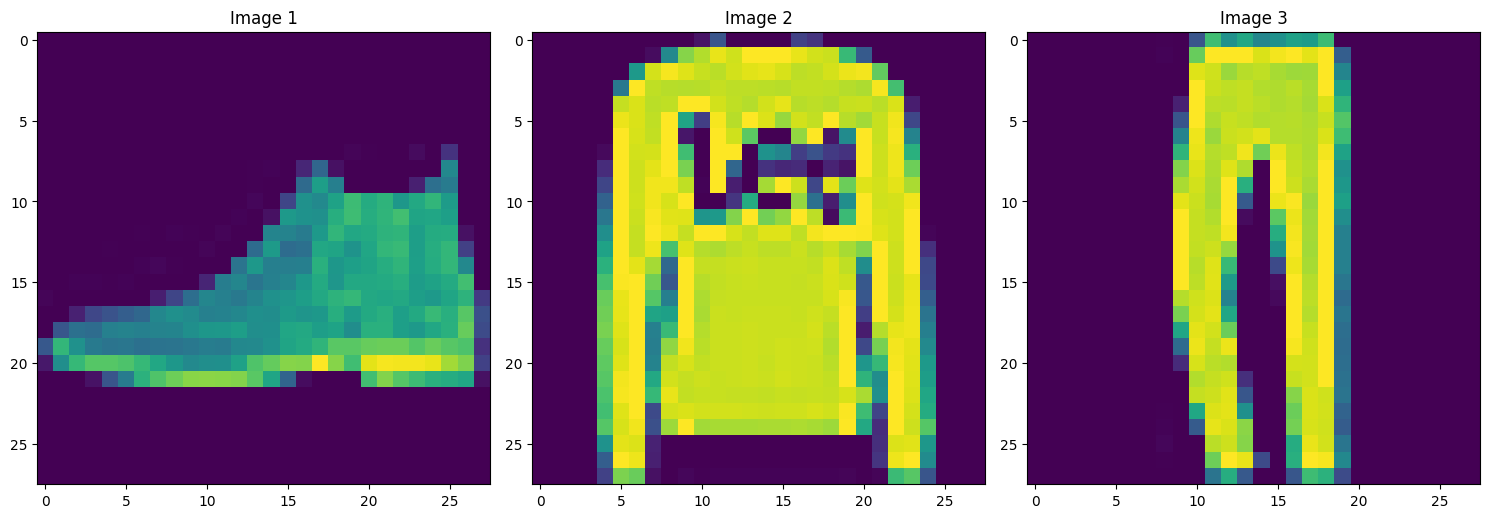

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(0,3):
  img1 = X_test[i]
  axes[i].imshow(img1)
  axes[i].set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()

In [40]:
from keras.optimizers import *
batch_size = [20, 50, 100][:1]

epochs = [1, 20, 50][:1]

initializer = ['lecun_uniform', 'normal', 'he_normal', 'he_uniform'][:1]

learning_rate = [0.1, 0.001, 0.02][:1]

dropout_rate = [0.3, 0.2, 0.8][:1]

num_unit = [10, 5][:1]

activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'][:1]

optimizer = [SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam][:1]

In [58]:
from sklearn.model_selection import GridSearchCV

optmodel = keras.models.Sequential()
optmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

parameters = dict(batch_size = batch_size,
                  epochs = epochs,
                  dropout_rate = dropout_rate,
                  num_unit = num_unit,
                  initializer = initializer,
                  learning_rate = learning_rate,
                  activation = activation,
                  optimizer = optimizer)
models = GridSearchCV(estimator = optmodel, param_grid=parameters, n_jobs=1)

In [56]:
import pprint
pp = pprint.PrettyPrinter(indent = 4)
best_model = models.fit(X_train, y_train)
print('Best model :')
pp.pprint(best_model.best_params_)

TypeError: ignored